In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import plotly.io as pio

In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! git clone https://github.com/sebassaras02/RPT_calibra_G4

fatal: destination path 'RPT_calibra_G4' already exists and is not an empty directory.


In [ ]:
matrix = []
for i in range(40000):
  matrix.append(np.loadtxt('/content/RPT_calibra_G4/matrix/NaIDetector_matrix_pos'+str(i+1)+'.dat'))

In [ ]:
from copy import deepcopy

See how looks data

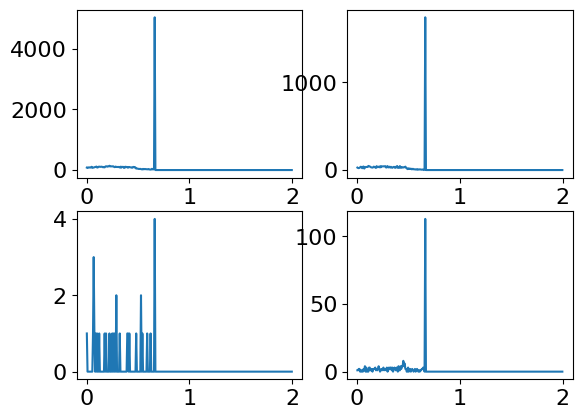

In [ ]:
plt.subplot(2,2,1)
plt.plot(matrix[1][:,0], matrix[1][:,1])
plt.subplot(2,2,2)
plt.plot(matrix[1][:,0], matrix[1][:,2])
plt.subplot(2,2,3)
plt.plot(matrix[1][:,0], matrix[1][:,3])
plt.subplot(2,2,4)
plt.plot(matrix[1][:,0], matrix[1][:,4])

Mount drive and load colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
positions = np.loadtxt('/content/drive/MyDrive/TFM/positions_matrix.txt')

In [ ]:
matrix_n = deepcopy(matrix)

Filter only relevant data

In [ ]:
matrix_n = np.array(matrix_n)

In [ ]:
matrix_n = matrix_n[:,:150,:]

# Data Treatment

In [ ]:
def median_filter(vector):
    filtered_vector = np.zeros(len(vector))

    for i in range(len(vector)):
        if i < 95 and vector[i] < 0.5:
            # si la posición es menor a 95 y el valor es menor a 1
            subvector = vector[max(0, i-2):min(len(vector), i+3)]
            subvector = subvector[subvector >= 1]  # filtrar los valores que sean mayores o iguales a 1
            if len(subvector) > 0:
                filtered_vector[i] = np.median(subvector)  # calcular la mediana del subvector
            else:
                filtered_vector[i] = vector[i]
        else:
            filtered_vector[i] = vector[i]  # si no cumple las condiciones, dejarlo tal cual

    return filtered_vector

In [ ]:
def mean_filter(vector):
    filtered_vector = np.zeros(len(vector))

    for i in range(len(vector)):
        if i < 95 and vector[i] < 1:
            # si la posición es menor a 95 y el valor es menor a 1
            subvector = vector[max(0, i-3):min(len(vector), i+4)]
            subvector = subvector[subvector >= 1]  # filtrar los valores que sean mayores o iguales a 1
            if len(subvector) > 0:
                filtered_vector[i] = np.mean(subvector)  # calcular la media del subvector
            else:
                filtered_vector[i] = vector[i]
        else:
            filtered_vector[i] = vector[i]  # si no cumple las condiciones, dejarlo tal cual

    return filtered_vector

In [ ]:
def mean_median_filters_combined(vector):
  vector = mean_filter(vector)
  vector = median_filter(vector)
  return vector

In [ ]:
def moving_average_filter(vector, window_size=5):
    filtered_vector = np.zeros(len(vector))

    # Aplicar el filtro solo a los primeros 95 valores
    for i in range(95):
        if i < window_size // 2:
            # Si estamos en la primera ventana, no podemos centrarla
            filtered_vector[i] = np.mean(vector[:i + window_size // 2 + 1])
        elif i >= len(vector) - window_size // 2:
            # Si estamos en la última ventana, no podemos centrarla
            filtered_vector[i] = np.mean(vector[i - window_size // 2:])
        else:
            # Centramos la ventana
            filtered_vector[i] = np.mean(vector[i - window_size // 2:i + window_size // 2 + 1])

    # Copiar los valores restantes sin filtrar
    filtered_vector[95:] = vector[95:]

    return filtered_vector

Solve spectra with several zeros counts

In [ ]:
# for i in range(40000):
#   # Calcular la cantidad de ceros en cada columna
#   cant_ceros = np.count_nonzero(matrix_n[i][0:95] == 0, axis=0)
#   # Obtener un vector booleano que indique qué columnas tienen más de 5 ceros
#   condicion = cant_ceros > 5
#   if sum(condicion) != 0:
#     # Obtener las columnas que cumplen la condición
#     columnas_filtrar = np.where(condicion)[0]
#     # Aplicar el filtro de mediana solo a las columnas seleccionadas
#     matrix_n[i][:, columnas_filtrar] = np.apply_along_axis(moving_average_filter, 0, matrix_n[i][:, columnas_filtrar])
#   else:
#     pass


In [ ]:
# Crear diccionario para contar número de veces que se aplica el filtro a cada columna
contador_filtro = {}

for i in range(40000):
    # Calcular la cantidad de ceros en cada columna
    cant_ceros = np.count_nonzero(matrix_n[i][0:95] == 0, axis=0)
    # Obtener un vector booleano que indique qué columnas tienen más de 5 ceros
    condicion = cant_ceros > 5
    if sum(condicion) != 0:
        # Obtener las columnas que cumplen la condición
        columnas_filtrar = np.where(condicion)[0]
        # Actualizar contador de filtros por columna
        for col in columnas_filtrar:
            if col in contador_filtro:
                contador_filtro[col] += 1
            else:
                contador_filtro[col] = 1
        # Aplicar el filtro de mediana solo a las columnas seleccionadas
        matrix_n[i][:, columnas_filtrar] = np.apply_along_axis(moving_average_filter, 0, matrix_n[i][:, columnas_filtrar])
    else:
        pass

# Imprimir el contador de filtros por columna
print(contador_filtro)

{3: 5733, 4: 13359, 1: 13104, 2: 5622}


In [ ]:
n = 5600-1

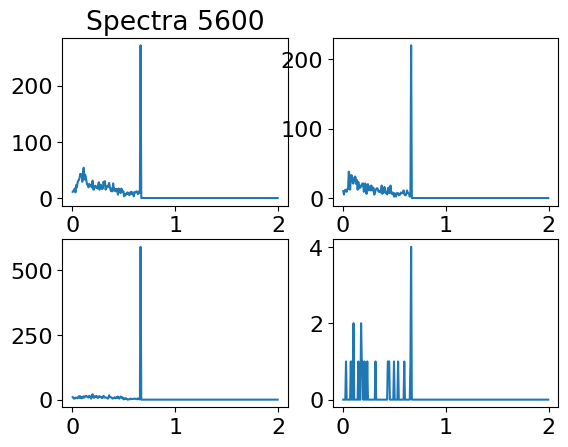

In [ ]:
plt.subplot(2,2,1)
plt.title('Spectra ' +str(n+1))
plt.plot(matrix[n][:,0], matrix[n][:,1])
plt.subplot(2,2,2)
plt.plot(matrix[n][:,0], matrix[n][:,2])
plt.subplot(2,2,3)
plt.plot(matrix[n][:,0], matrix[n][:,3])
plt.subplot(2,2,4)
plt.plot(matrix[n][:,0], matrix[n][:,4])

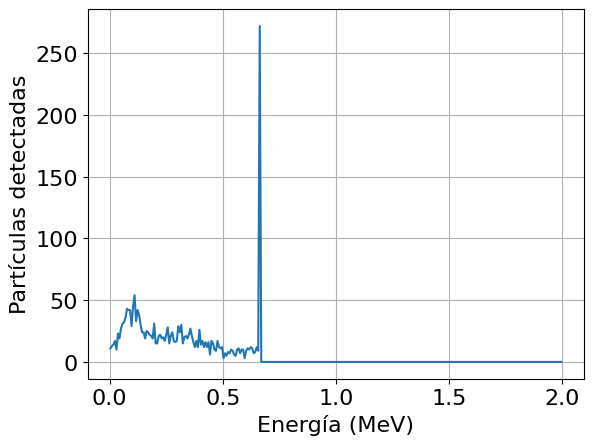

In [ ]:
plt.plot(matrix[n][:,0], matrix[n][:,1])
plt.xlabel('Energía (MeV)')
plt.ylabel('Partículas detectadas')
plt.grid()
plt.savefig('Espectro_gamma.jpg', dpi = 300)

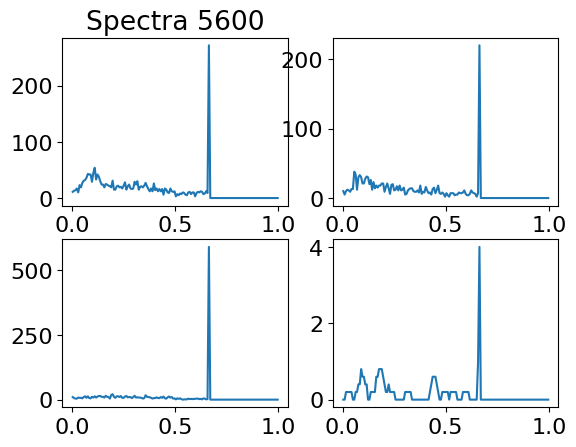

In [ ]:
plt.subplot(2,2,1)
plt.title('Spectra ' +str(n+1))
plt.plot(matrix_n[n][:,0], matrix_n[n][:,1])
plt.subplot(2,2,2)
plt.plot(matrix_n[n][:,0], matrix_n[n][:,2])
plt.subplot(2,2,3)
plt.plot(matrix_n[n][:,0], matrix_n[n][:,3])
plt.subplot(2,2,4)
plt.plot(matrix_n[n][:,0], matrix_n[n][:,4])

In [ ]:
min2 = np.min(matrix_n[:,:,1:])
max2 = np.max(matrix_n[:,:,1:])

In [ ]:
matrix_n[:,:,1:] = (matrix_n[:,:,1:] - min2) / (max2-min2)

Create a DF to save the data

In [ ]:
a = matrix_n.reshape(40000, 150*5, order = 'F')

In [ ]:
df = pd.DataFrame(a,columns = [str(i) for i in range(1, 751)])

In [ ]:
df['x'] = positions[:, 0]
df['y'] = positions[:, 1]
df['z'] = positions[:, 2]

In [ ]:
df.shape

(40000, 753)

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,744,745,746,747,748,749,750,x,y,z
0,0.003333,0.01,0.016667,0.023333,0.03,0.036667,0.043333,0.05,0.056667,0.063333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-0.1,-0.10000
1,0.003333,0.01,0.016667,0.023333,0.03,0.036667,0.043333,0.05,0.056667,0.063333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-0.1,-0.08947
2,0.003333,0.01,0.016667,0.023333,0.03,0.036667,0.043333,0.05,0.056667,0.063333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-0.1,-0.07895
3,0.003333,0.01,0.016667,0.023333,0.03,0.036667,0.043333,0.05,0.056667,0.063333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-0.1,-0.06842
4,0.003333,0.01,0.016667,0.023333,0.03,0.036667,0.043333,0.05,0.056667,0.063333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-0.1,-0.05789


Split data into training, validation and test

In [ ]:
X1 = df.iloc[:,150:450]
X2 = df.iloc[:,600:750]
Y1 = df.iloc[:,450:600]
Y2 = df.iloc[:,750:]
Y = pd.concat([Y1, Y2], axis = 1)
X = pd.concat([X1, X2], axis = 1)

In [ ]:
X.shape

(40000, 450)

In [ ]:
Y.shape

(40000, 153)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 99)

Get information about the positions used for the training and test

In [ ]:
pos_train = Y_train.iloc[:,150:]

In [ ]:
pos_test = Y_test.iloc[:,150:]

Delete the columns of the positions

In [ ]:
Y_train = Y_train.drop(['x', 'y', 'z'], axis = 1)
Y_test = Y_test.drop(['x', 'y', 'z'], axis = 1)

# Performance of the model

Create own functions to see the yield of the model

1 .Peak ponderate error (PPE)

In [ ]:
def peak_ponderate_error(Ytest, Ypred):

  peak_vals_pred = np.zeros(len(Ypred))
  peak_vals_test = np.zeros(len(Ytest))

  for idx, data in enumerate([Ypred, Ytest]):
      for i in range(len(data)):
          selected_data = data[i][95:105]
          max_value = np.max(selected_data)
          if idx == 0:
              peak_vals_pred[i] = max_value
          else:
              peak_vals_test[i] = max_value

  peaks = np.vstack((peak_vals_test, peak_vals_pred)).T

  five_points_pred = np.zeros((len(Ypred),5))
  five_points_test = np.zeros((len(Ypred),5))

  for idx, data in enumerate([Ypred, Ytest]):
      for i in range(len(data)):
        n_values = 5
        selected_data = data[i][np.linspace(0, 95, n_values, dtype=int)]
        if idx == 0:
              five_points_pred[i, :] = selected_data.flatten()
        else:
              five_points_test[i, :] = selected_data.flatten()

  # start with the error calculation

  pred_vals = peak_vals_pred*0.75 + np.sum(five_points_pred, axis=1)*0.25
  test_vals = peak_vals_test*0.75 + np.sum(five_points_test, axis=1)*0.25
  pke = np.abs(pred_vals - test_vals)/np.abs(test_vals)
  pke[np.isinf(pke)] = 0
  return pke

2. Peak - Compton error (PCE)

In [ ]:
def peak_compton_ratio(Ytest, Ypred):

  peak_vals_pred = np.zeros(len(Ypred))
  peak_vals_test = np.zeros(len(Ytest))

  for idx, data in enumerate([Ypred, Ytest]):
      for i in range(len(data)):
          selected_data = data[i][95:105]
          max_value = np.max(selected_data)
          if idx == 0:
              peak_vals_pred[i] = max_value
          else:
              peak_vals_test[i] = max_value

  peaks = np.vstack((peak_vals_test, peak_vals_pred)).T


  com_vals_pred = np.zeros(len(Ypred))
  com_vals_test = np.zeros(len(Ytest))

  for idx, data in enumerate([Ypred, Ytest]):
      for i in range(len(data)):
          selected_data = data[i][90:95]
          val = sum(selected_data)
          if idx == 0:
              com_vals_pred[i] = val
          else:
              com_vals_test[i] = val

  rtpred = peak_vals_pred-com_vals_pred
  rttest = peak_vals_test-com_vals_test
  m = []
  for i in range(len(rtpred)):
    if rtpred[i] != 0:
      a = np.abs(rtpred[i]-rttest[i])/np.abs(rtpred[i])
      m.append(a)
    else:
      m.append(0)

  return m

3. Absolute error of peak (AEP)

In [ ]:
def ape_per_point(Ytest, Ypred):
  a = []
  for i in range(len(Ypred)):
    if Ytest[i] != 0:
      m = np.abs(Ytest[i]-Ypred[i])/np.abs(Ytest[i])*100
      a.append(m[0])
    else:
      a.append(0)
  return a

#Create a XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# model1 = XGBRegressor(tree_method = 'gpu_hist')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# # Definir los hiperparámetros para buscar
# parameters = {'n_estimators': [50,100,200,400],
#               'max_depth': [1, 3, 5, 9]}

# # Realizar la búsqueda de parámetros óptimos
# grid_search = RandomizedSearchCV(estimator=model1, param_distributions=parameters, cv=3, n_jobs=-1, verbose=0)
# grid_search.fit(X_train, Y_train)

In [ ]:
# model1 = grid_search.best_estimator_

In [ ]:
import pickle

In [ ]:
model_dir1 =  '/content/drive/MyDrive/TFM/Models/Single prediction/modelo_xgb_spec_det3.pickle'

In [ ]:
with open(model_dir1, 'rb') as archivo:
    model1 = pickle.load(archivo)

In [ ]:
Y_pred = model1.predict(X_test)

In [ ]:
Y_test.iloc[1]

451    0.000906
452    0.001177
453    0.002173
454    0.001992
455    0.001902
         ...   
596    0.000000
597    0.000000
598    0.000000
599    0.000000
600    0.000000
Name: 25946, Length: 150, dtype: float64

In [ ]:
plt.rcParams.update({'font.size': 16})

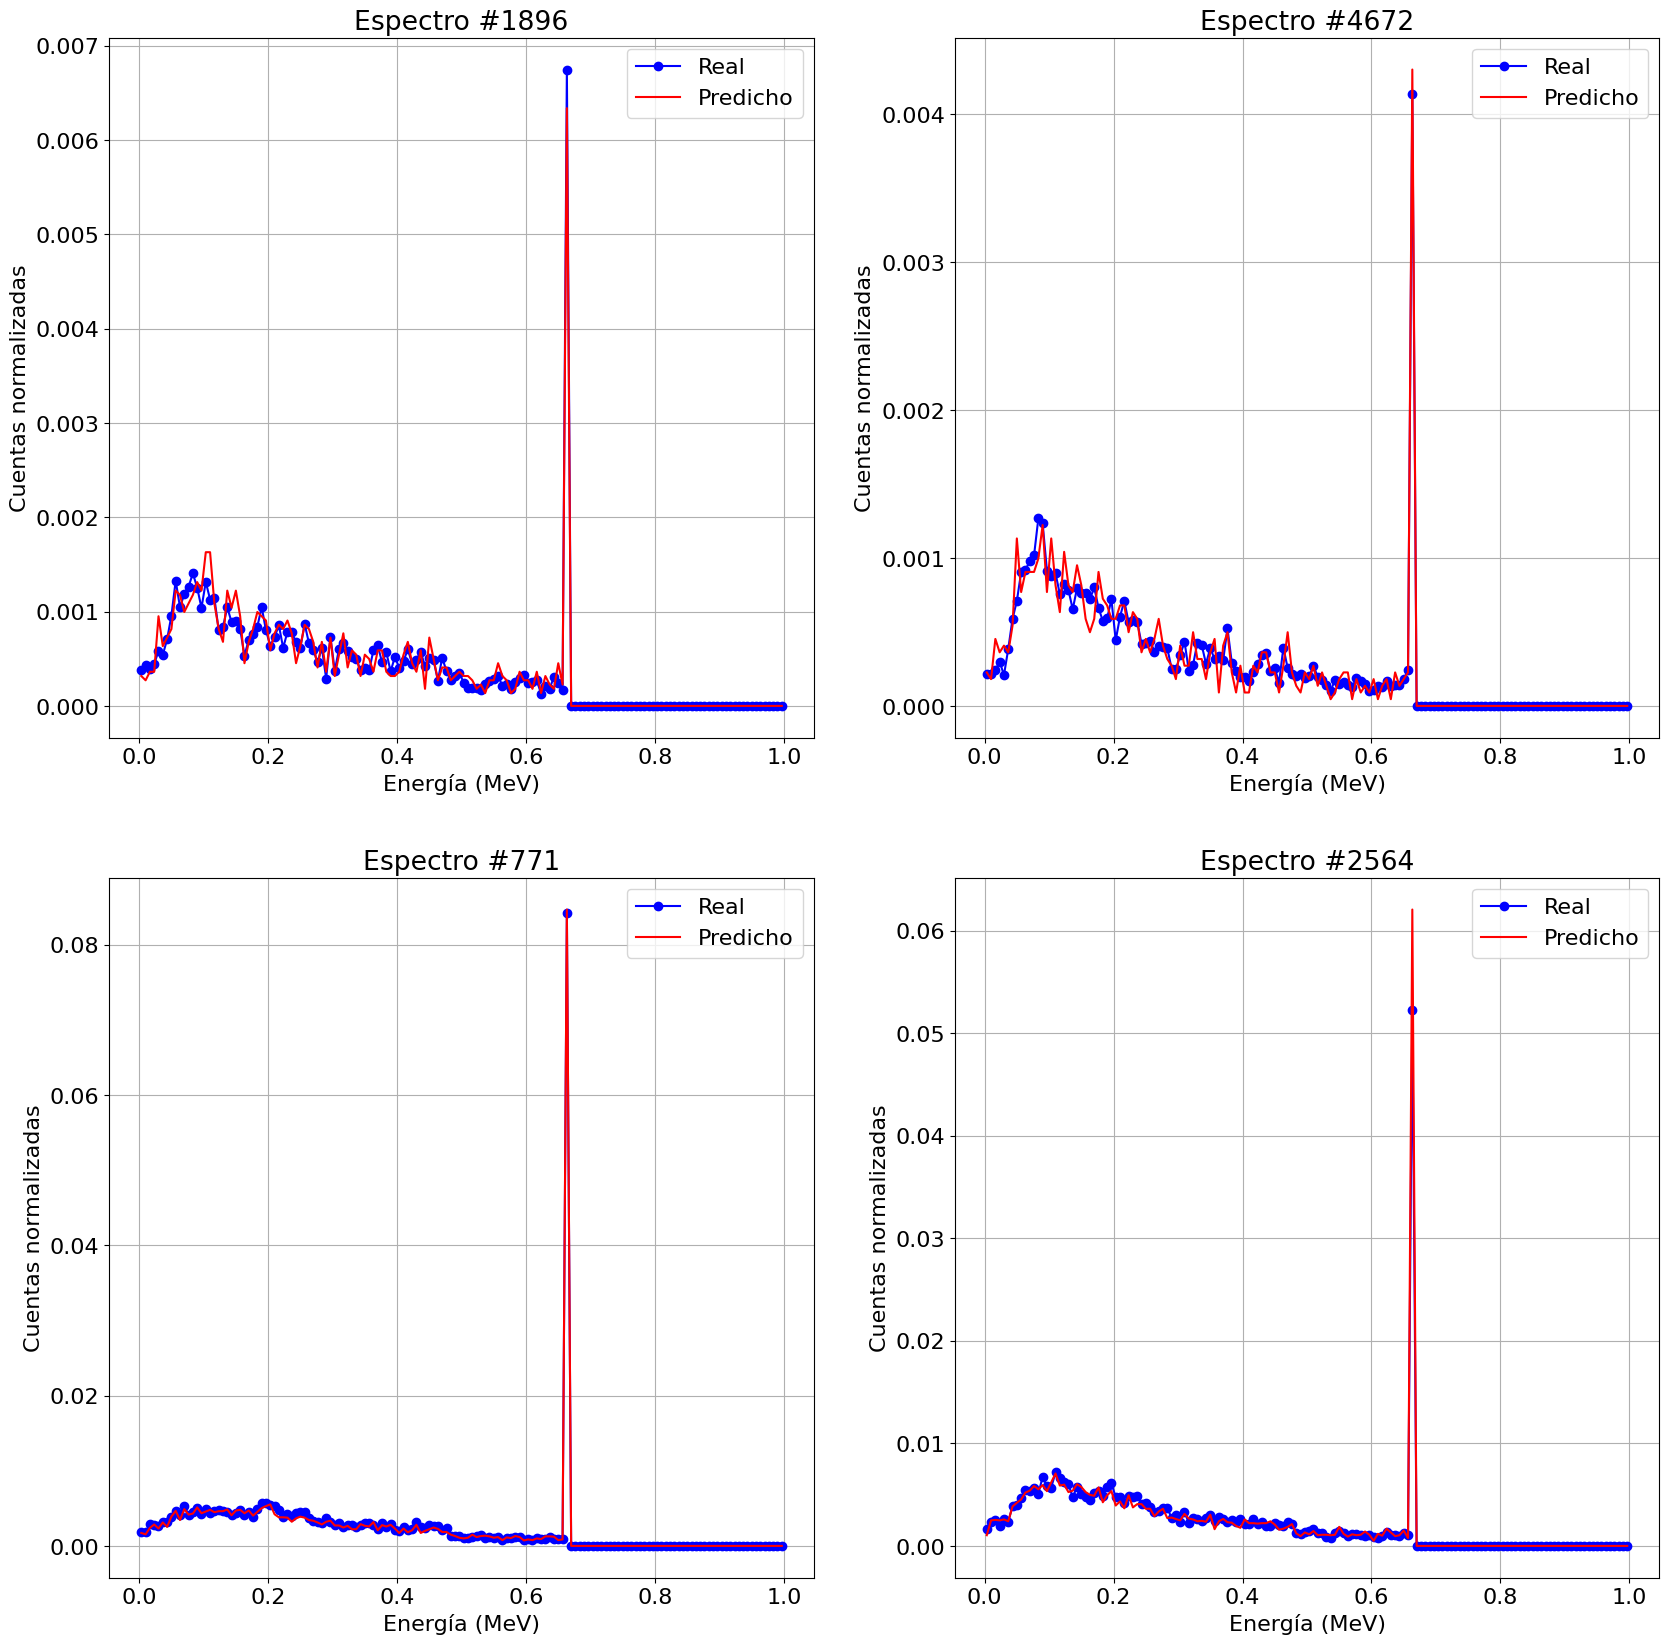

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
n = np.random.randint(0, 6000)
plt.plot(df.iloc[1,:150],Y_pred[n,:], 'o-b', label = 'Real')
plt.plot(df.iloc[1,:150], Y_test.iloc[n,:], '-r', label = 'Predicho')
plt.xlabel('Energía (MeV)')
plt.ylabel('Cuentas normalizadas')
plt.title('Espectro #'+str(n))
plt.grid()
plt.legend()

plt.subplot(2,2,2)
n = np.random.randint(0, 6000)
plt.plot(df.iloc[1,:150],Y_pred[n,:], 'o-b', label = 'Real')
plt.plot(df.iloc[1,:150], Y_test.iloc[n,:], '-r', label = 'Predicho')
plt.xlabel('Energía (MeV)')
plt.ylabel('Cuentas normalizadas')
plt.title('Espectro #'+str(n))
plt.grid()
plt.legend()

plt.subplot(2,2,3)
n = np.random.randint(0, 6000)
plt.plot(df.iloc[1,:150],Y_pred[n,:], 'o-b', label = 'Real')
plt.plot(df.iloc[1,:150], Y_test.iloc[n,:], '-r', label = 'Predicho')
plt.xlabel('Energía (MeV)')
plt.ylabel('Cuentas normalizadas')
plt.title('Espectro #'+str(n))
plt.grid()
plt.legend()

plt.subplot(2,2,4)
n = np.random.randint(0, 6000)
plt.plot(df.iloc[1,:150],Y_pred[n,:], 'o-b', label = 'Real')
plt.plot(df.iloc[1,:150], Y_test.iloc[n,:], '-r', label = 'Predicho')
plt.xlabel('Energía (MeV)')
plt.ylabel('Cuentas normalizadas')
plt.title('Espectro #'+str(n))
plt.grid()
plt.legend()

Make a cross validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Crear objeto KFold
kf = KFold(n_splits=5)

# Definir array para guardar los resultados de la validación cruzada
results_ppe = []
results_pcr = []

In [ ]:
kf.split(X)

<generator object _BaseKFold.split at 0x7f77be7732e0>

In [ ]:
# Realizar validación cruzada
for train_index, test_index in kf.split(X):
    # Obtener conjuntos de entrenamiento y prueba
    X_train_c, X_test_c = X.iloc[train_index], X.iloc[test_index]
    y_train_c, y_test_c = Y.iloc[train_index], Y.iloc[test_index]
    y_train_c  = y_train_c.drop(['x', 'y', 'z'], axis = 1)
    y_test_c  = y_test_c.drop(['x', 'y', 'z'], axis = 1)

    # Predecir valores para conjunto de prueba
    y_pred_c = model1.predict(X_test_c)

    # Calcular métricas de evaluación
    ppe_c = peak_ponderate_error(y_test_c.values, y_pred_c)
    pcr_c = peak_compton_ratio(y_test_c.values, y_pred_c)

    # Guardar resultado
    results_ppe.append(np.mean(ppe_c))
    results_pcr.append(np.mean(pcr_c))

In [ ]:
results_ppe

[0.17733839878239915,
 0.058058120352807406,
 0.03528406510535769,
 0.032360519729119644,
 0.05329439980456154]

In [ ]:
results_pcr

[1.6288998552178946,
 0.08989323205765509,
 0.04448291260712723,
 0.03842660940558666,
 0.06879532025512844]

See where the algorithm fails

In [ ]:
Y_pred = pd.DataFrame(Y_pred, index = Y_test.index)

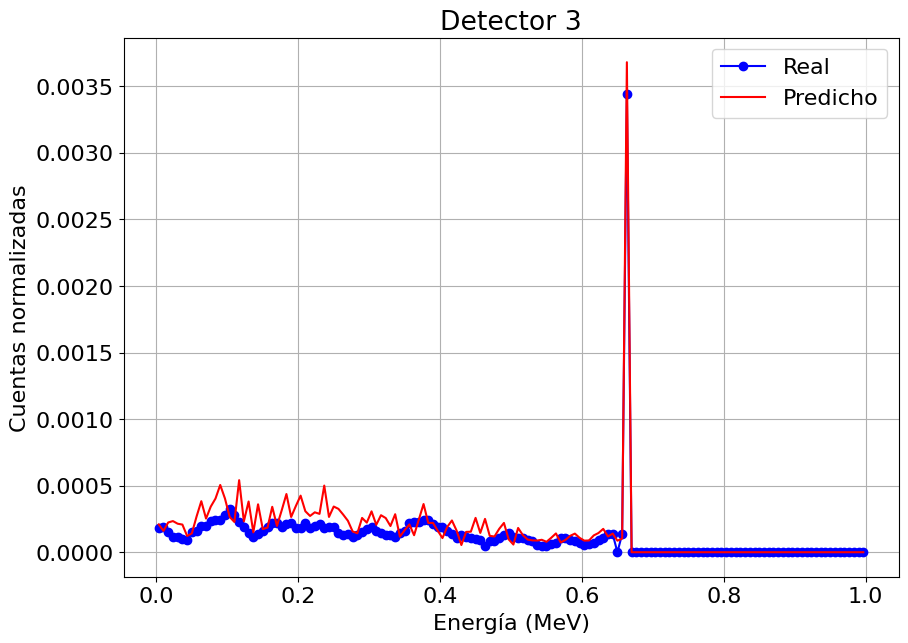

In [ ]:
plt.figure(figsize = (10,7))
n = 2055
plt.plot(df.iloc[1, :150],Y_test.loc[n], 'o-b', label = 'Real')
plt.plot(df.iloc[1, :150],Y_pred.loc[n], '-r', label = 'Predicho')
plt.grid()
plt.legend()
plt.title('Detector 3')
plt.xlabel('Energía (MeV)')
plt.ylabel('Cuentas normalizadas')
plt.savefig('pos_2055_det3.jpg', dpi =300)

### Peak ponderate error calculation

In [ ]:
ppe = peak_ponderate_error(np.array(Y_test), Y_pred)

In [ ]:
max(ppe)

4.459176582088503

In [ ]:
def plot_cylinder(x0, y0, z0, figure, color):
    # Definimos las coordenadas del cilindro
    theta = np.linspace(0, 2*np.pi, 100)
    x = 0.04 * np.cos(theta) + x0
    y = 0.04 * np.sin(theta) + y0
    z = np.linspace(z0, z0+0.04, 100)

    # Creamos la figura
    fig = figure

    # Agregamos el cilindro como superficie de revolución
    fig.add_trace(go.Surface(x=np.outer(x, np.ones_like(z)),
                              y=np.outer(y, np.ones_like(z)),
                              z=np.outer(np.ones_like(x), z),
                              colorscale=[[0, color], [1, color]],
                              showscale=False))
    return fig

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Define la función de la superficie
def f(x, y, z):
    return np.where((x > -0.5) & (x < 0.5) & (y > -0.1) & (y < 0.1) & (z > -0.1) & (z < 0.1), 1, 0)

# Define los valores para la grilla
x, y, z = np.mgrid[-0.6:0.6:30j, -0.2:0.2:30j, -0.2:0.2:30j]

# Calcula los valores de la función en la grilla
vol = f(x, y, z)

# Genera la figura
fig = go.Figure()

# Genera la isosuperficie
# fig.add_trace(go.Isosurface(x=x.flatten(), y=y.flatten(), z=z.flatten(),
#                             value=vol.flatten(), isomin=0.9, surface_count=1,
#                             caps=dict(x_show=False, y_show=False), showscale=False,
#                             opacity=0.5))

# Agrega una capa de puntos
# fig.add_trace(go.Scatter3d(x=pos_test.iloc[:,0], y=pos_test.iloc[:,1], z=pos_test.iloc[:,2], mode='markers',
#                            marker=dict(color=ppe, colorscale='Viridis', size=5)))

fig.add_trace(
    go.Scatter3d(
        x=pos_test.iloc[:,0],
        y=pos_test.iloc[:,1],
        z=pos_test.iloc[:,2],
        mode='markers',
        marker=dict(
            color=ppe,
            colorscale='Viridis',
            size=5,
            cmin = 0,
            cmax = 1,
            colorbar=dict(
                title='EPP',  # Título de la colorbar
                titleside='right',  # Posición del título
                tickmode='auto',  # Selecciona el modo de los ticks
                ticks='outside',  # Posición de los ticks
                ticklen=10,  # Longitud de los ticks
                showticklabels=True,  # Muestra los labels de los ticks
                thickness=20,  # Grosor de la barra
            )
        )
    )
)

plot_cylinder(-0.4, 0, -0.2, fig, 'red')
plot_cylinder(-0.2, -0.2, 0, fig, 'purple')
plot_cylinder(0.2, 0, 0.2, fig, 'blue')
plot_cylinder(0.4, 0, -0.2, fig, 'pink')

# Define el tamaño del eje
fig.update_layout(scene=dict(xaxis=dict(range=[-0.8, 0.8]),
                              yaxis=dict(range=[-0.4, 0.4]),
                              zaxis=dict(range=[-0.4, 0.4])))

# Muestra la figura
fig.update_layout(scene_camera=dict(eye=dict(x=1, y=-2, z=0.5)))
pio.write_image(fig, '/content/drive/MyDrive/TFM/Pictures/Single detector/det3/vista1_ppe_2_det1.jpg')
fig.update_layout(scene_camera=dict(eye=dict(x=1, y=2, z=-0.5)))
pio.write_image(fig, '/content/drive/MyDrive/TFM/Pictures/Single detector/det3/vista2_ppe_2_det1.jpg')
# fig.show()


See mean values

In [ ]:
print("Mean Overall PPE ", np.mean(ppe))

Mean Overall PPE  0.07003610867307425


### Peak Compton zone calculation

In [ ]:
pcr = peak_compton_ratio(np.array(Y_test), Y_pred)

In [ ]:
# Define la función de la superficie
def f(x, y, z):
    return np.where((x > -0.5) & (x < 0.5) & (y > -0.1) & (y < 0.1) & (z > -0.1) & (z < 0.1), 1, 0)

# Define los valores para la grilla
x, y, z = np.mgrid[-0.6:0.6:30j, -0.2:0.2:30j, -0.2:0.2:30j]

# Calcula los valores de la función en la grilla
vol = f(x, y, z)

# Genera la figura
fig = go.Figure()

# Genera la isosuperficie
# fig.add_trace(go.Isosurface(x=x.flatten(), y=y.flatten(), z=z.flatten(),
#                             value=vol.flatten(), isomin=0.9, surface_count=1,
#                             caps=dict(x_show=False, y_show=False), showscale=False,
#                             opacity=0.5))

# Agrega una capa de puntos
# fig.add_trace(go.Scatter3d(x=pos_test.iloc[:,0], y=pos_test.iloc[:,1], z=pos_test.iloc[:,2], mode='markers',
#                            marker=dict(color=ppe, colorscale='Viridis', size=5)))

fig.add_trace(
    go.Scatter3d(
        x=pos_test.iloc[:,0],
        y=pos_test.iloc[:,1],
        z=pos_test.iloc[:,2],
        mode='markers',
        marker=dict(
            color=pcr,
            colorscale='Viridis',
            size=5,
            cmin = 0,
            cmax = 1,
            colorbar=dict(
                title='EFC',  # Título de la colorbar
                titleside='right',  # Posición del título
                tickmode='auto',  # Selecciona el modo de los ticks
                ticks='outside',  # Posición de los ticks
                ticklen=5,  # Longitud de los ticks
                showticklabels=True,  # Muestra los labels de los ticks
                thickness=20,  # Grosor de la barra
            )
        )
    )
)

plot_cylinder(-0.4, 0, -0.2, fig, 'red')
plot_cylinder(-0.2, -0.2, 0, fig, 'purple')
plot_cylinder(0.2, 0, 0.2, fig, 'blue')
plot_cylinder(0.4, 0, -0.2, fig, 'pink')

# Define el tamaño del eje
fig.update_layout(scene=dict(xaxis=dict(range=[-0.8, 0.8]),
                              yaxis=dict(range=[-0.4, 0.4]),
                              zaxis=dict(range=[-0.4, 0.4])))

# Muestra la figura
fig.update_layout(scene_camera=dict(eye=dict(x=1, y=-2, z=0.5)))
pio.write_image(fig, '/content/drive/MyDrive/TFM/Pictures/Single detector/det3/vista1_pcr_2_det1.jpg')
fig.update_layout(scene_camera=dict(eye=dict(x=1, y=2, z=-0.5)))
pio.write_image(fig, '/content/drive/MyDrive/TFM/Pictures/Single detector/det3/vista2_pcr_2_det1.jpg')

See mean values

In [ ]:
print("Mean Overall PCE ", np.mean(pcr))

Mean Overall PCE  0.24015228741801994


# Only peak value prediction



Get the value only of the photopeak

In [ ]:
df_val = pd.DataFrame()
df_val['Det-1'] = df.iloc[:,95+150:105+150].apply(lambda x: max(x), axis = 1)
df_val['Det-2'] = df.iloc[:,95+150*2:105+150*2].apply(lambda x: max(x), axis = 1)
df_val['Det-3'] = df.iloc[:,95+150*3:105+150*3].apply(lambda x: max(x), axis = 1)
df_val['Det-4'] = df.iloc[:,95+150*4:105+150*4].apply(lambda x: max(x), axis = 1)
df_val['x'] = df['x']
df_val['y'] = df['y']
df_val['z'] = df['z']

In [ ]:
df_val.shape

(40000, 7)

See the correlation between each variable

1. Linear correlation

In [ ]:
import seaborn as sns

In [ ]:
df_val.corr().iloc[:4,:4]

,Det-1,Det-2,Det-3,Det-4
Det-1,1.000000,0.065561,-0.228428,-0.146007
Det-2,0.065561,1.000000,-0.173372,-0.199514
Det-3,-0.228428,-0.173372,1.000000,-0.116932
Det-4,-0.146007,-0.199514,-0.116932,1.000000


<Axes: >

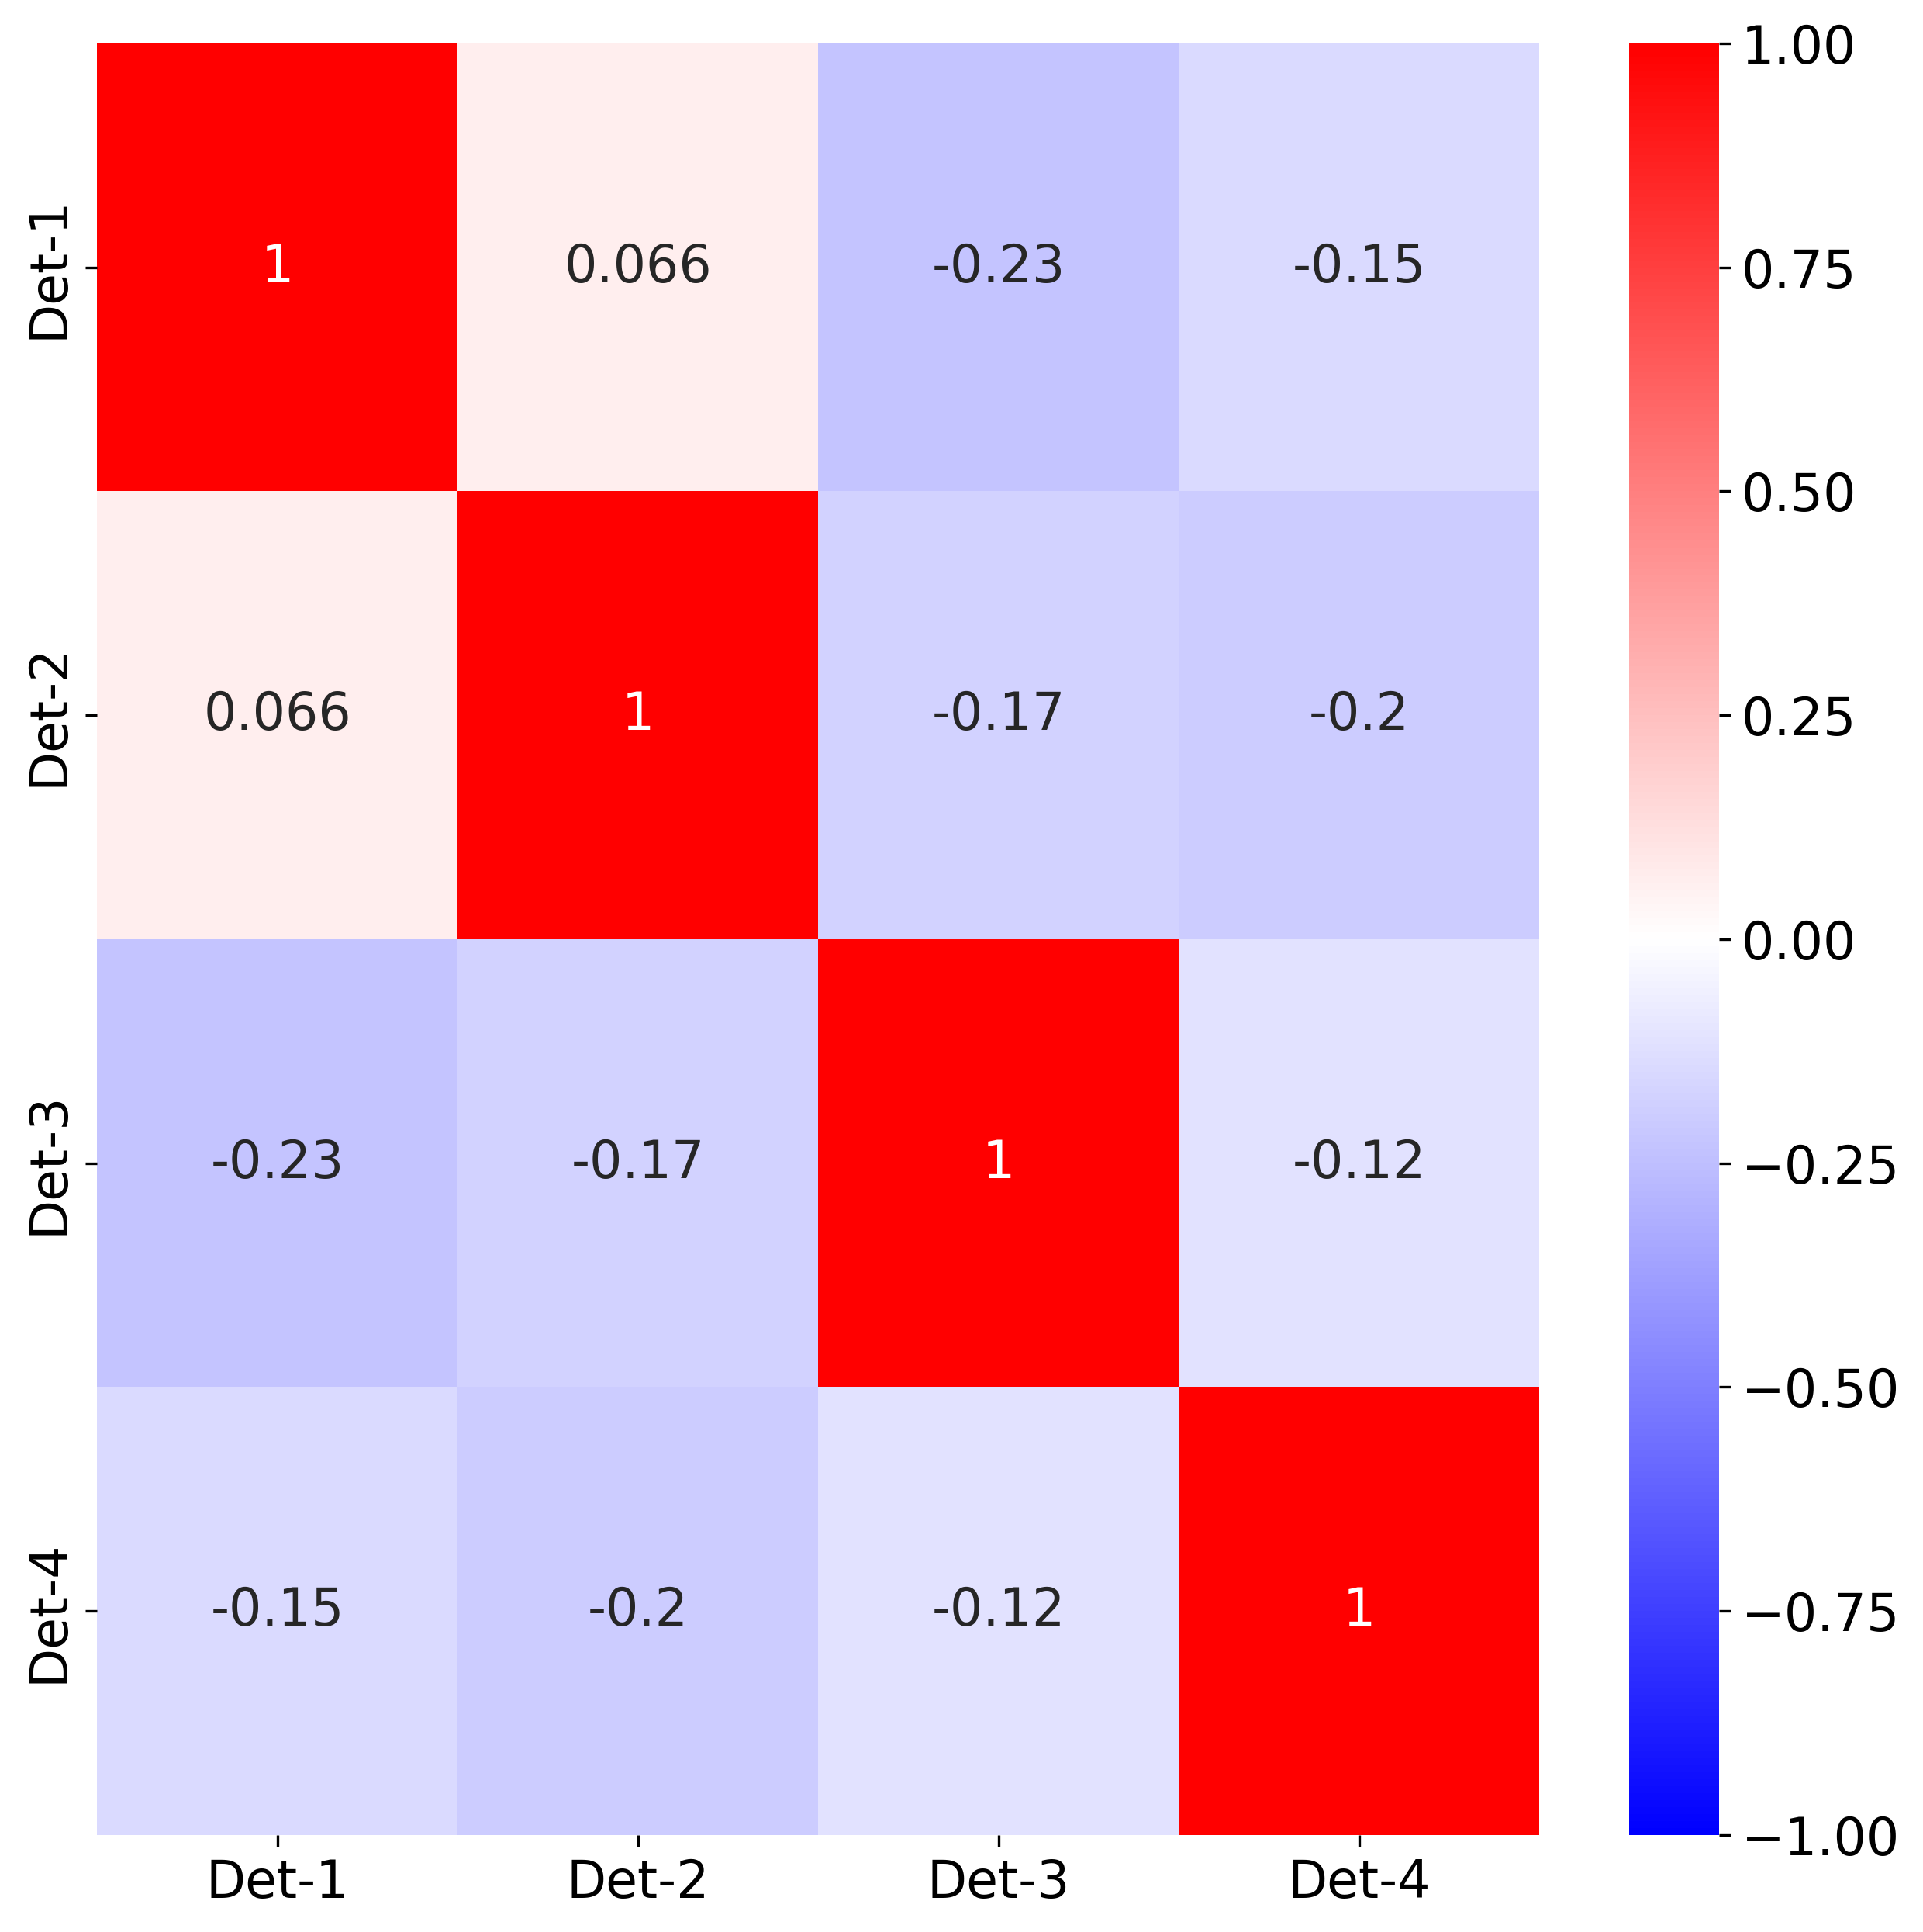

In [ ]:
plt.figure(figsize = (10,10), dpi = 300)
sns.heatmap(df_val.corr().iloc[:4,:4], annot = True, vmin = -1, vmax = 1, cmap = 'bwr')

2. Any kind of correlation through Phik Matrix

In [ ]:
!pip install phik
import phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 17.8 MB/s eta 0:00:00


interval columns not set, guessing: ['Det-1', 'Det-2', 'Det-3', 'Det-4', 'x', 'y', 'z']


<Axes: >

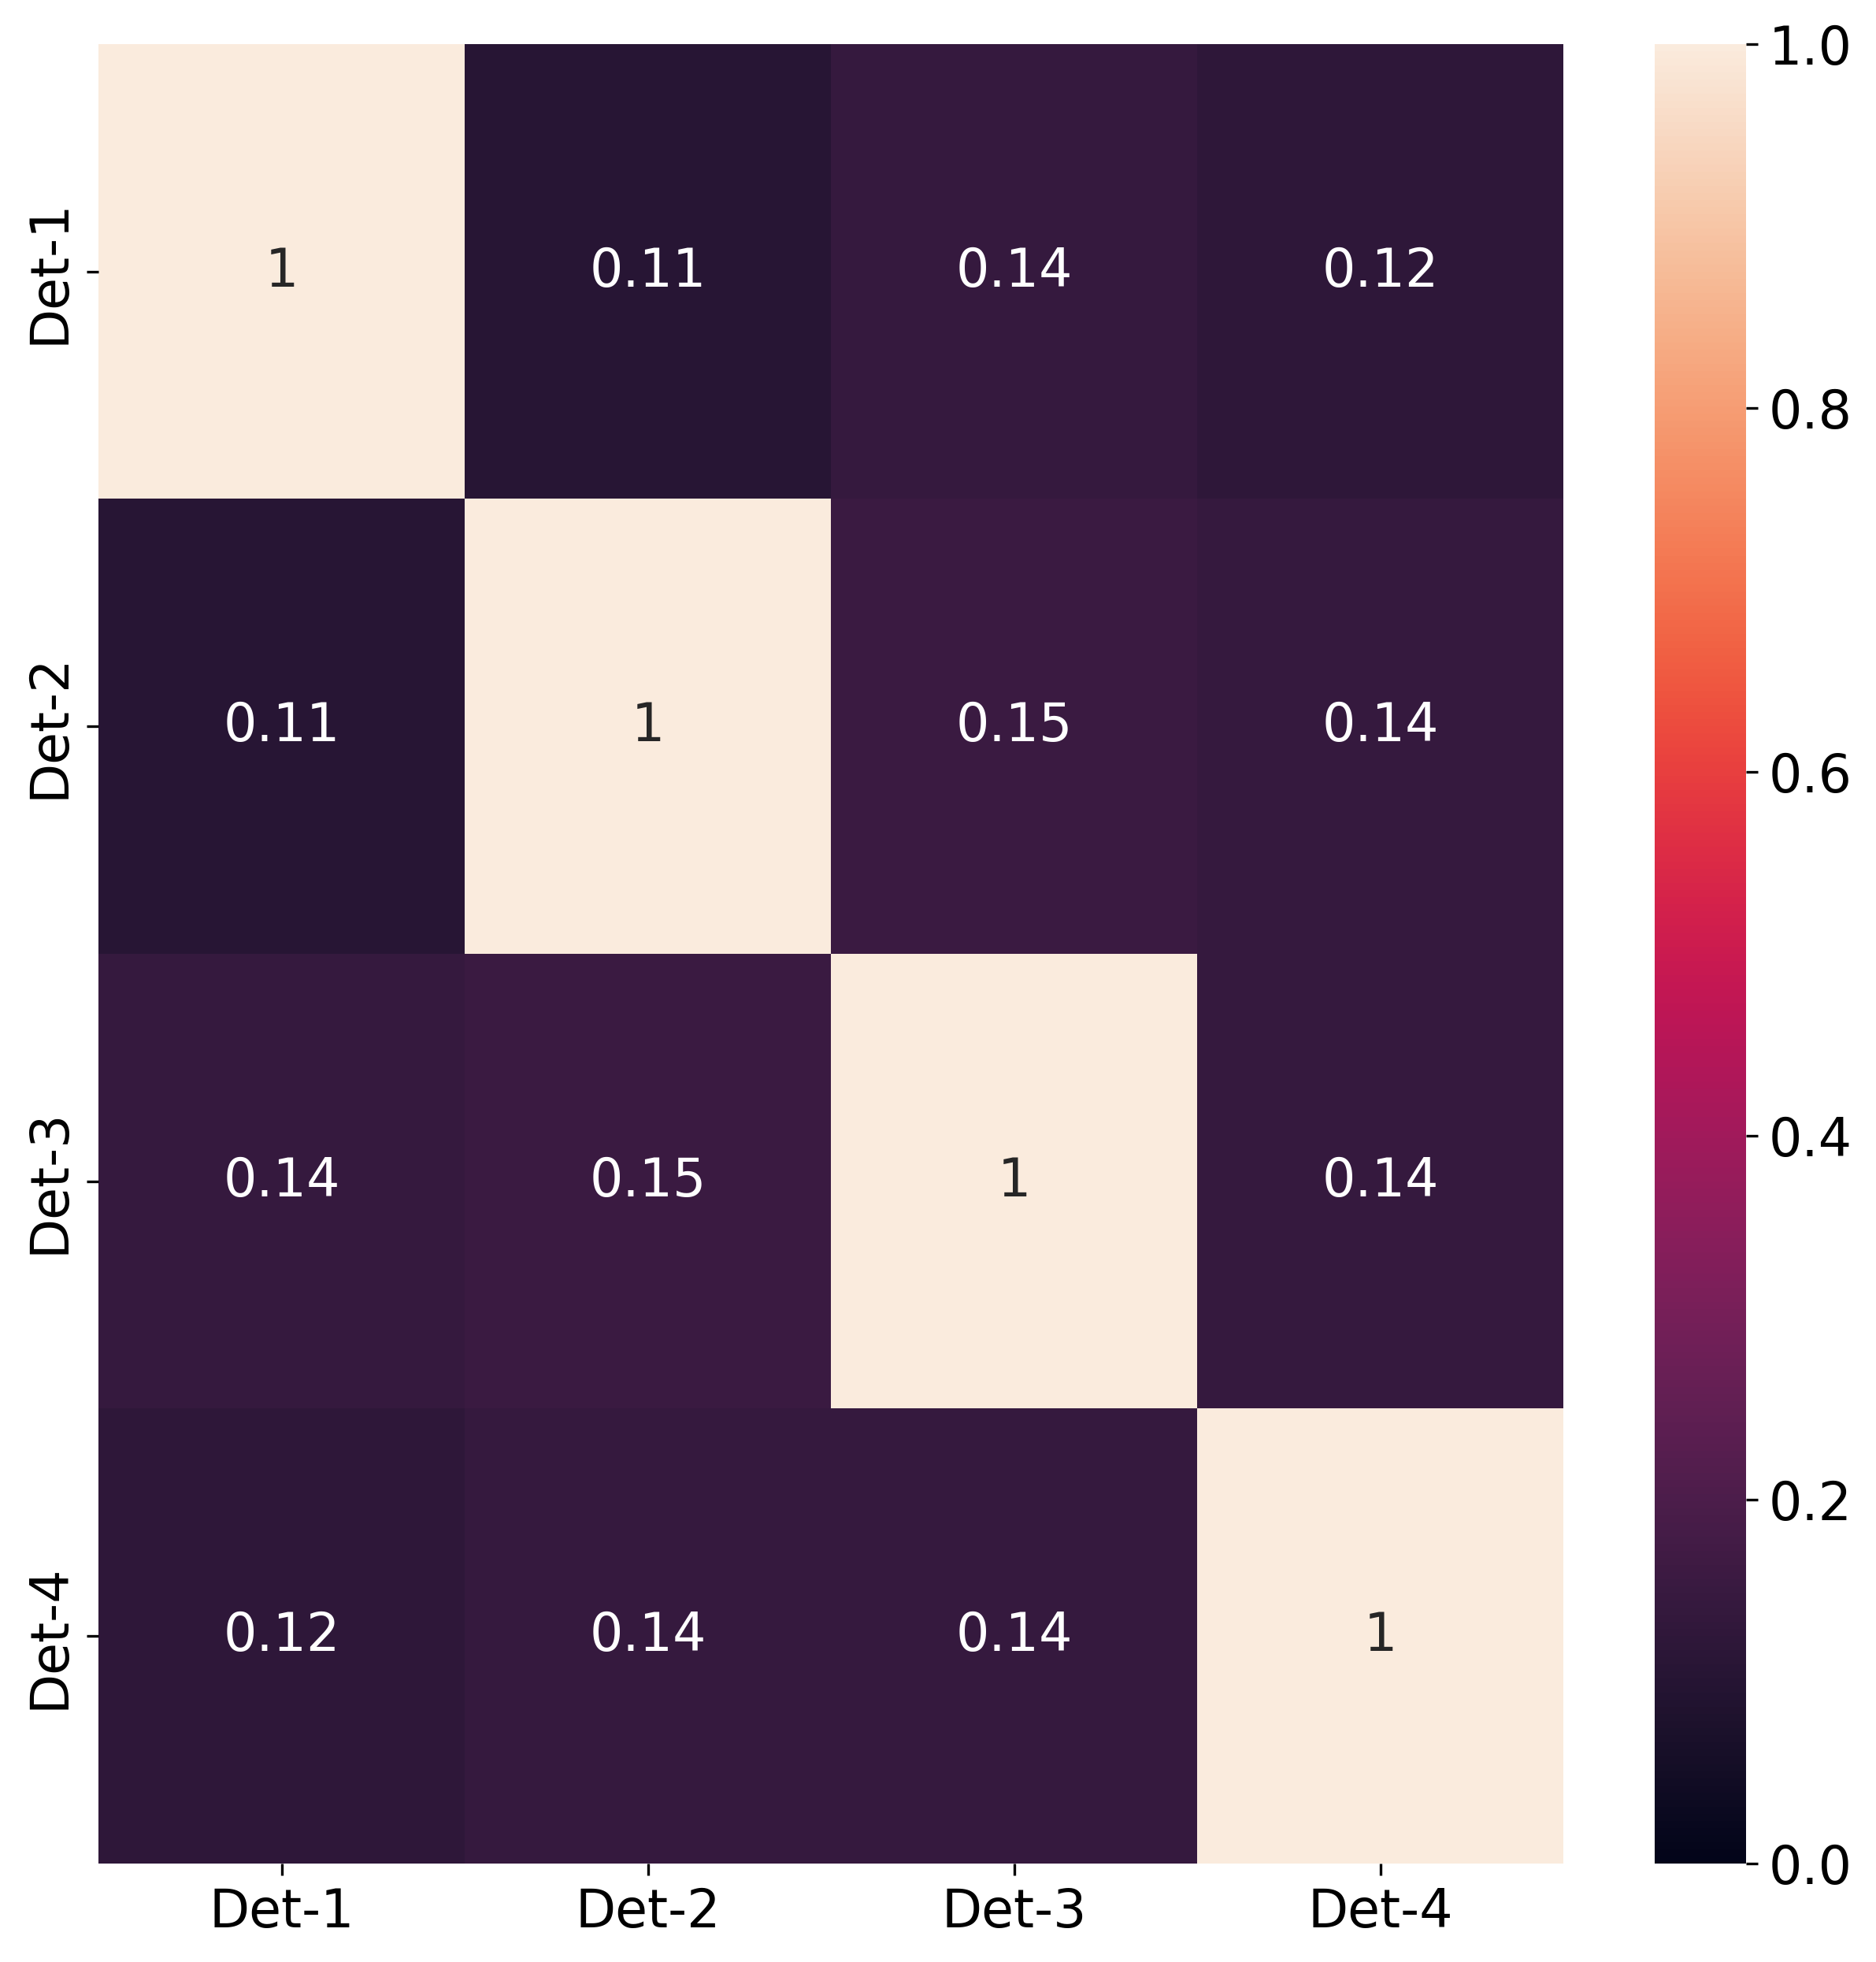

In [ ]:
plt.figure(figsize = (10,10), dpi = 300)
sns.heatmap(df_val.phik_matrix().iloc[:4,:4], annot = True, vmin = 0, vmax = 1)

3. See any kind of relation visually

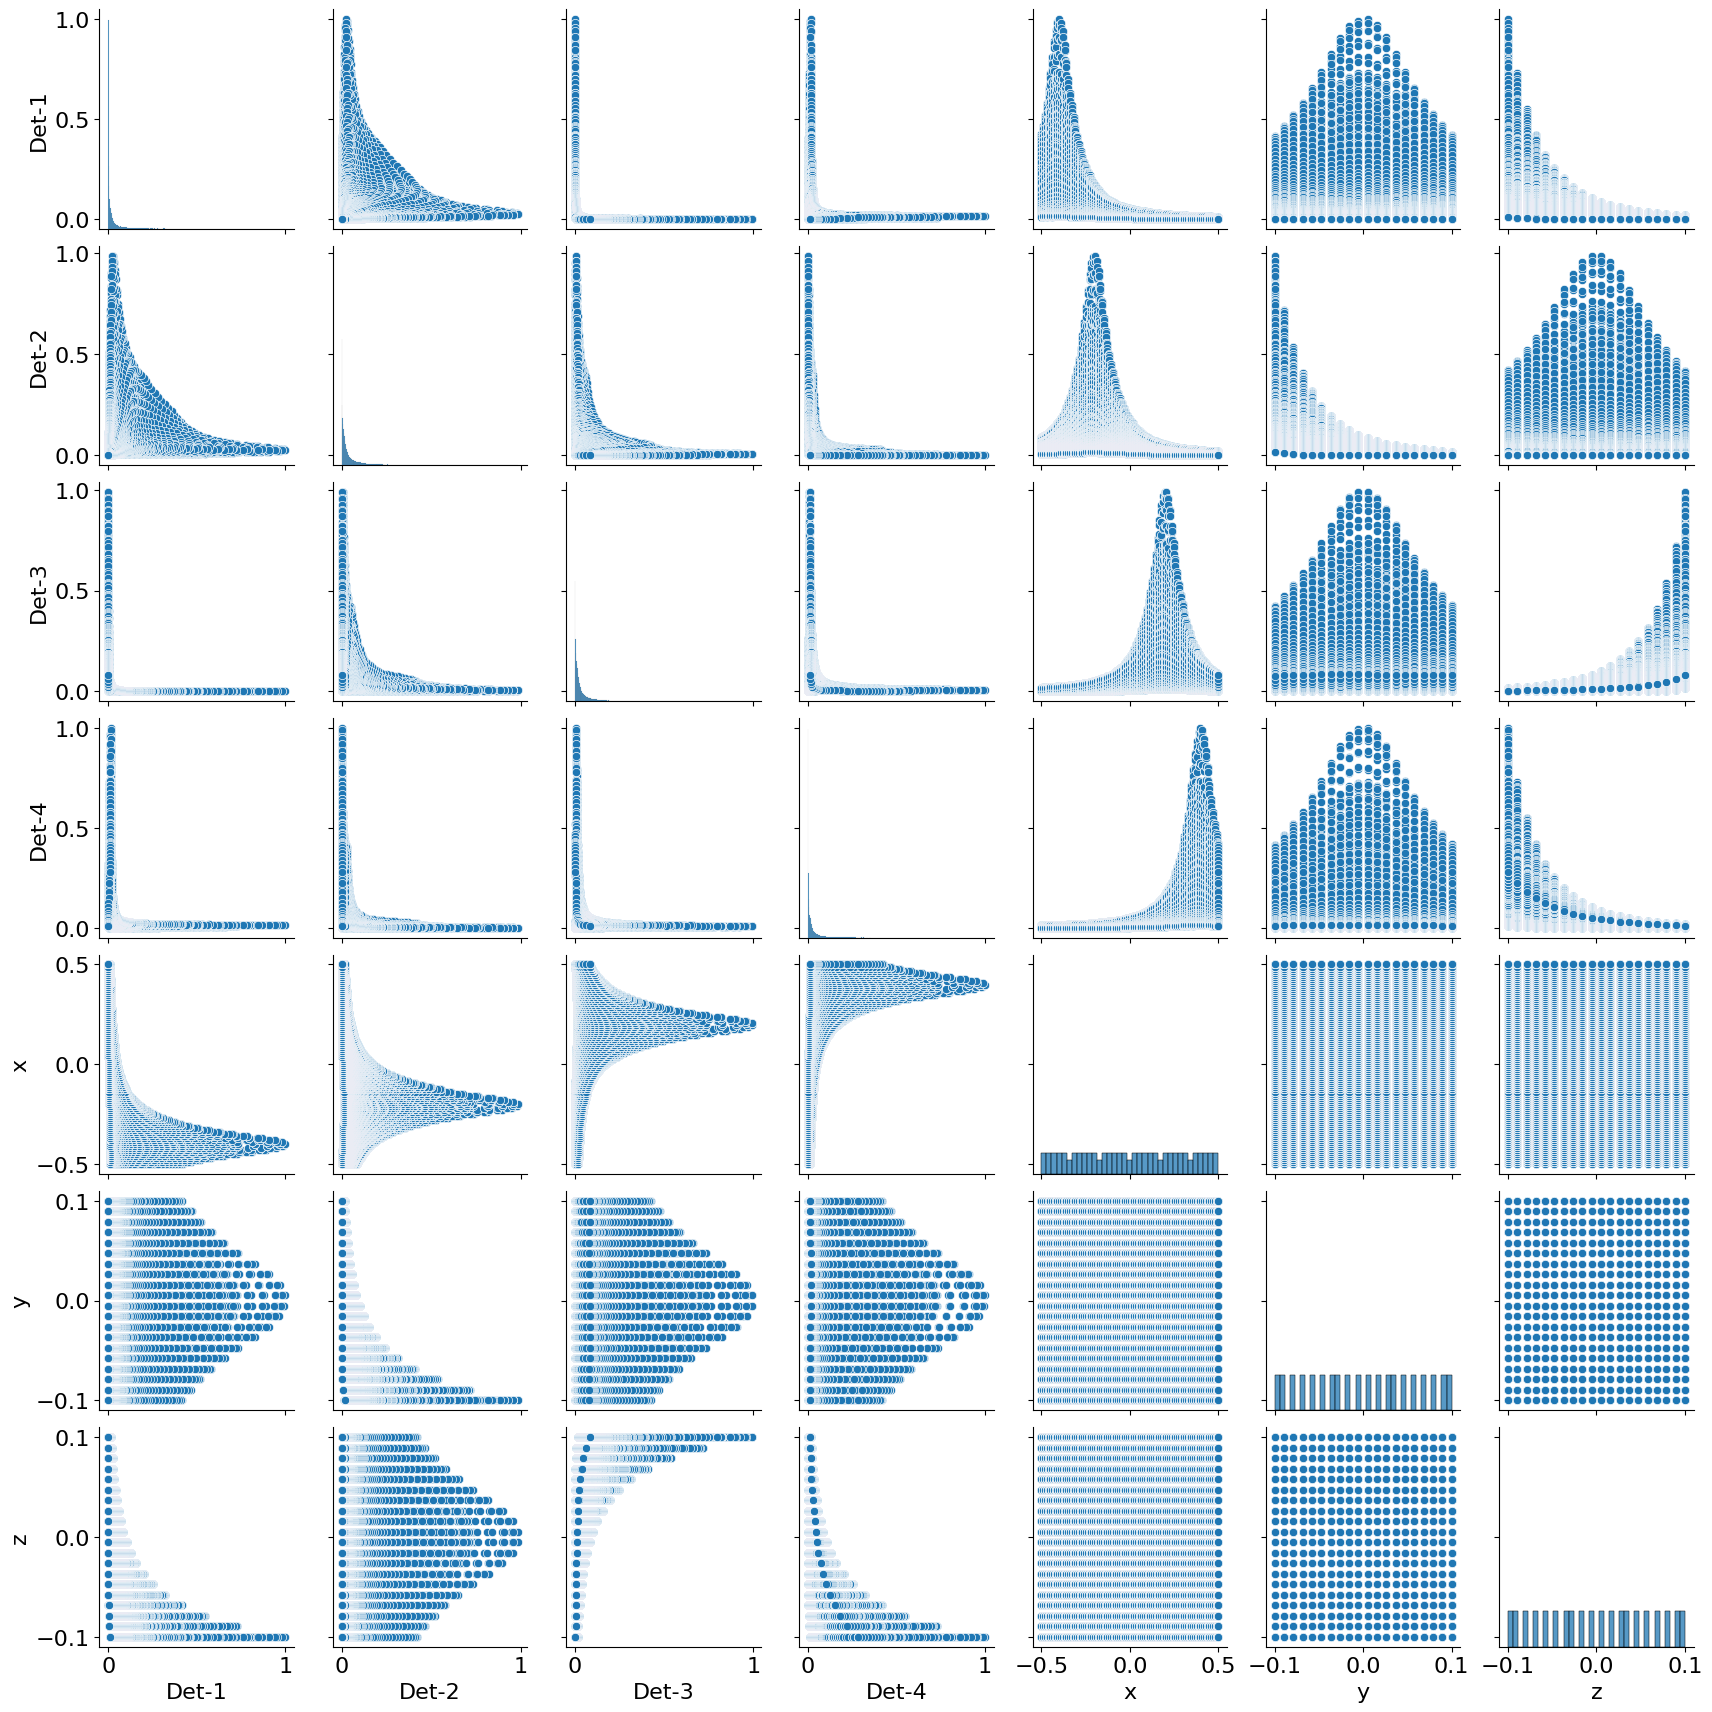

In [ ]:
sns.pairplot(data = df_val)

4. See mutual information metric

In [ ]:
from sklearn.feature_selection  import mutual_info_regression

In [ ]:
cols = list(df_val.columns)

Detector 1

In [ ]:
for i in cols:
  mutual_info = mutual_info_regression(df_val[['Det-1']], df_val[i])
  print("La información mutua entre "+'Det-1'+" e " +i+" es:", mutual_info)

La información mutua entre Det-1 e Det-1 es: [6.89863964]
La información mutua entre Det-1 e Det-2 es: [0.27756682]
La información mutua entre Det-1 e Det-3 es: [1.1305839]
La información mutua entre Det-1 e Det-4 es: [0.58565539]
La información mutua entre Det-1 e x es: [0.8582939]
La información mutua entre Det-1 e y es: [0]
La información mutua entre Det-1 e z es: [0.41870763]


Detector 2

In [ ]:
for i in cols:
  mutual_info = mutual_info_regression(df_val[['Det-2']], df_val[i])
  print("La información mutua entre "+'Det-2'+" e " +i+" es:", mutual_info)

La información mutua entre Det-2 e Det-1 es: [0.27673754]
La información mutua entre Det-2 e Det-2 es: [7.46836218]
La información mutua entre Det-2 e Det-3 es: [0.1461627]
La información mutua entre Det-2 e Det-4 es: [0.2949911]
La información mutua entre Det-2 e x es: [0.70166189]
La información mutua entre Det-2 e y es: [0.43435668]
La información mutua entre Det-2 e z es: [0]


Detector 3

In [ ]:
for i in cols:
  mutual_info = mutual_info_regression(df_val[['Det-3']], df_val[i])
  print("La información mutua entre "+'Det-3'+" e " +i+" es:", mutual_info)

La información mutua entre Det-3 e Det-1 es: [1.13190741]
La información mutua entre Det-3 e Det-2 es: [0.14647344]
La información mutua entre Det-3 e Det-3 es: [7.47668164]
La información mutua entre Det-3 e Det-4 es: [0.49779791]
La información mutua entre Det-3 e x es: [0.6742893]
La información mutua entre Det-3 e y es: [0]
La información mutua entre Det-3 e z es: [0.44326825]


Detector 4

In [ ]:
for i in cols:
  mutual_info = mutual_info_regression(df_val[['Det-4']], df_val[i])
  print("La información mutua entre "+'Det-4'+" e " +i+" es:", mutual_info)

La información mutua entre Det-4 e Det-1 es: [0.58366156]
La información mutua entre Det-4 e Det-2 es: [0.29554902]
La información mutua entre Det-4 e Det-3 es: [0.49722957]
La información mutua entre Det-4 e Det-4 es: [6.9075446]
La información mutua entre Det-4 e x es: [0.84061999]
La información mutua entre Det-4 e y es: [0.01137354]
La información mutua entre Det-4 e z es: [0.42530433]


5. See how many zeros are in the dataset

In [ ]:
# Contar los ceros en cada columna del DataFrame
num_zeros = np.sum(df_val == 0, axis=0)

In [ ]:
num_zeros

Det-1    275
Det-2      0
Det-3      0
Det-4     88
x          0
y          0
z          0
dtype: int64

### Create a XGBoost Regressor

In [ ]:
X = df_val[['Det-1', 'Det-2', 'Det-4']]
Y = df_val[['Det-3', 'x', 'y', 'z']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 99)

Get information about the positions used for the training and test

In [ ]:
pos_train = Y_train.iloc[:,1:]

In [ ]:
pos_test = Y_test.iloc[:,1:]

Delete the columns of the positions

In [ ]:
Y_train = Y_train.drop(['x', 'y', 'z'], axis = 1)
Y_test = Y_test.drop(['x', 'y', 'z'], axis = 1)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# model4 = XGBRegressor(tree_method = 'gpu_hist')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# # Definir los hiperparámetros para buscar
# parameters = {'n_estimators': [50,100,200,400],
#               'max_depth': [1, 3, 5, 9]}

# # Realizar la búsqueda de parámetros óptimos
# grid_search = RandomizedSearchCV(estimator=model4, param_distributions=parameters, cv=3, n_jobs=-1, verbose=0)
# grid_search.fit(X_train, Y_train)

In [ ]:
# model4 = grid_search.best_estimator_

In [ ]:
model_dir4 =  '/content/drive/MyDrive/TFM/Models/Single prediction/modelo_xgb_peak_det3.pickle'

In [ ]:
with open(model_dir4, 'rb') as archivo:
    model4 = pickle.load(archivo)

In [ ]:
Y_pred = model4.predict(X_test)

In [ ]:
Y_test.values

array([[0.00027167],
       [0.03744453],
       [0.0074708 ],
       ...,
       [0.23802409],
       [0.00049805],
       [0.01213438]])

In [ ]:
mae = ape_per_point(Y_test.values, Y_pred)

In [ ]:
# Define la función de la superficie
def f(x, y, z):
    return np.where((x > -0.5) & (x < 0.5) & (y > -0.1) & (y < 0.1) & (z > -0.1) & (z < 0.1), 1, 0)

# Define los valores para la grilla
x, y, z = np.mgrid[-0.6:0.6:30j, -0.2:0.2:30j, -0.2:0.2:30j]

# Calcula los valores de la función en la grilla
vol = f(x, y, z)

# Genera la figura
fig = go.Figure()

# Genera la isosuperficie
# fig.add_trace(go.Isosurface(x=x.flatten(), y=y.flatten(), z=z.flatten(),
#                             value=vol.flatten(), isomin=0.9, surface_count=1,
#                             caps=dict(x_show=False, y_show=False), showscale=False,
#                             opacity=0.5))

#Agrega una capa de puntos
fig.add_trace(go.Scatter3d(x=pos_test.iloc[:,0], y=pos_test.iloc[:,1], z=pos_test.iloc[:,2], mode='markers',
                           marker=dict(color=mae, colorscale='Viridis', cmin = 0, cmax = 100, size=5, colorbar=dict(
                title='Error (%)',  # Título de la colorbar
                titleside='right',  # Posición del título
                tickmode='auto',  # Selecciona el modo de los ticks
                ticks='outside',  # Posición de los ticks
                ticklen=5,  # Longitud de los ticks
                showticklabels=True,  # Muestra los labels de los ticks
                thickness=20,  # Grosor de la barra
            ))))

plot_cylinder(-0.4, 0, -0.2, fig, 'red')
plot_cylinder(-0.2, -0.2, 0, fig, 'purple')
plot_cylinder(0.2, 0, 0.2, fig, 'blue')
# detector predicho
plot_cylinder(0.4, 0, -0.2, fig, 'pink')

# Define el tamaño del eje
fig.update_layout(scene=dict(xaxis=dict(range=[-0.8, 0.8]),
                              yaxis=dict(range=[-0.4, 0.4]),
                              zaxis=dict(range=[-0.4, 0.4])))

# Muestra la figura
# fig.show()
fig.update_layout(scene_camera=dict(eye=dict(x=1, y=-2, z=0.5)))
pio.write_image(fig, '/content/drive/MyDrive/TFM/Pictures/Single detector/det3/vista1_mae_2_det1.jpg')
fig.update_layout(scene_camera=dict(eye=dict(x=1, y=2, z=-0.5)))
pio.write_image(fig, '/content/drive/MyDrive/TFM/Pictures/Single detector/det3/vista2_mae_2_det1.jpg')

See mean values

In [ ]:
print("Mean Overall PPE ", np.mean(mae))

Mean Overall PPE  33.170511758227185


Save the models

In [ ]:
# import pickle

In [ ]:
# # Save model of the whole spectrum
# filename = 'modelo_xgb_spec_det3.pickle'
# pickle.dump(model1, open(filename, 'wb'))

In [ ]:
# # Save model of the photopeak
# filename = 'modelo_xgb_peak_det3.pickle'
# pickle.dump(model4, open(filename, 'wb'))